# **Perform EDA and try to understand the data, preprocess the data, train, evaluate the model and analyze the results**

# **EDA**

In [48]:
#Import Library

import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Melihat info detail dari dataset yang kita punya seperti tipe data dari setiap kolom, jumlah nilai yang tidak kosong, dan penggunaan memori

In [52]:
summary_stats = df.describe()
summary_stats

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


menghitung statistik deskriptif untuk setiap kolom numerik

In [53]:
#Melihat data apa saja yang hilang
miss_values = df.isna().sum()
miss_values

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


Dari data diatas kita bisa lihat tidak ada data yang hilang

In [54]:
df.nunique()

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


Untuk kita bisa melihat ada berapa banyak variasi data di setiap kolom data, sejauh ini dari data yang kita bisa lihat datanya masih normal, variasi data dengan topik kolom yang ada masih sesuai, tidak ada anomali

In [55]:
# Memisahkan kolom numerik dan kategorikal menggunakan fungsi select_dtypes dari pandas

# Mengambil kolom numerik
num_columns = df.select_dtypes(include=['number']).columns.tolist()

# Mengambil kolom kategorikal
category_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Menampilkan kolom-kolom kategorikal dan numerik
print(f'Categorical: {category_columns}')
print(f'Numeric: {num_columns}')


Categorical: ['country', 'gender']
Numeric: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


menggunakan fungsi select_dtypes dari pandas untuk memisahkan kolom dalam DataFrame df menjadi dua kategori, yaitu kolom numerik yang disimpan dalam daftar num_columns dan kolom kategorikal yang disimpan dalam daftar category_columns

In [56]:
for col in category_columns:
    print(f'Distribution for {col}:')
    print(pd.crosstab(index=df[col], columns='count'))
    print('\n')

Distribution for country:
col_0    count
country       
France    5014
Germany   2509
Spain     2477


Distribution for gender:
col_0   count
gender       
Female   4543
Male     5457




menampilkan distribusi frekuensi jumlah kemunculan dari setiap nilai unik pada kolom-kolom kategorikal dalam dataset

In [57]:
# churned vs non-churned customers
churn_counts = df['churn'].value_counts()
churn_counts

,count
churn,
0,7963
1,2037


Dari data diatas kita bisa lihat bahwa ada sekitar 7963 customer yang tidak meninggalkan bank dan ada sekitar 2037 customer yang meninggalkan bank

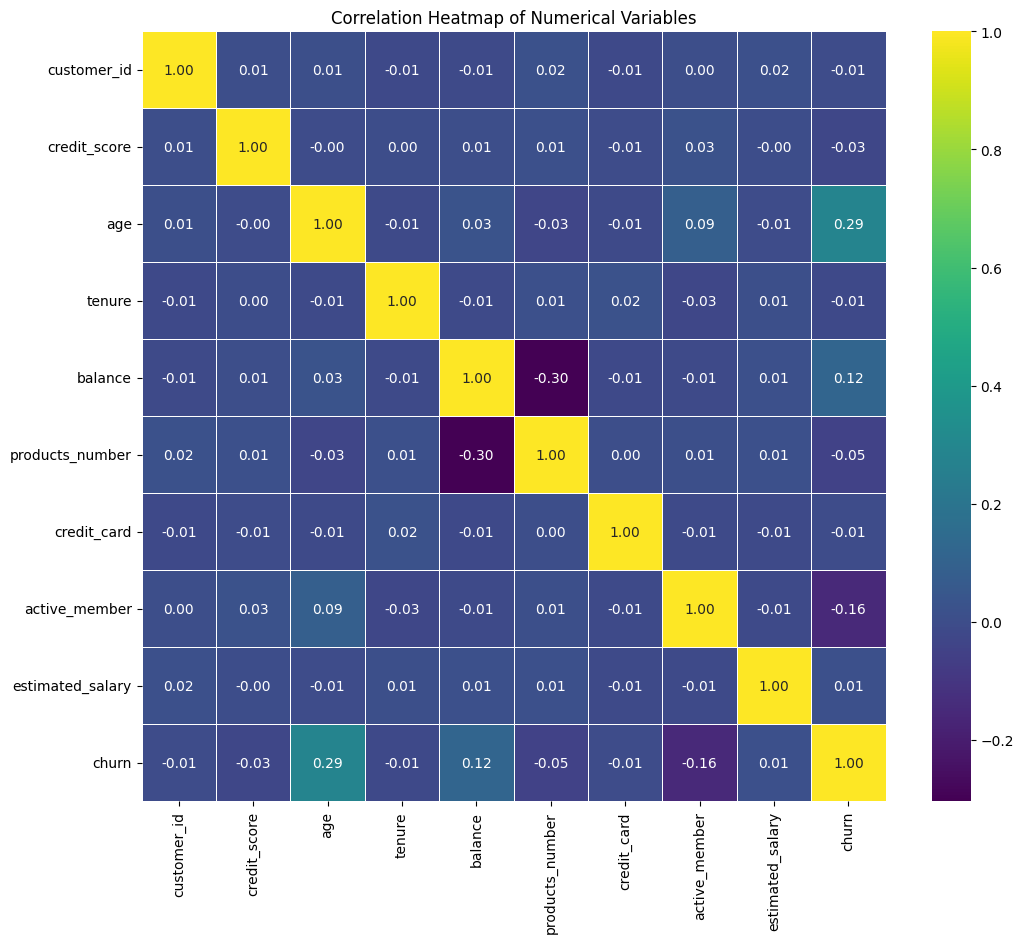

In [58]:
# Memilih kolom numerik menggunakan DataFrame method
numerical_cols = df.select_dtypes(include='number')

# Menghitung matriks korelasi
corr_matrix = numerical_cols.corr()

fig, ax = plt.subplots(figsize=(12, 10))  # Menggunakan subplots untuk mengatur ukuran
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap of Numerical Variables')
plt.show()

dapat disimpulkan bahwa umur pelanggan age memiliki hubungan positif terbesar dengan churn, sementara keaktifan sebagai anggota active_member memiliki hubungan negatif

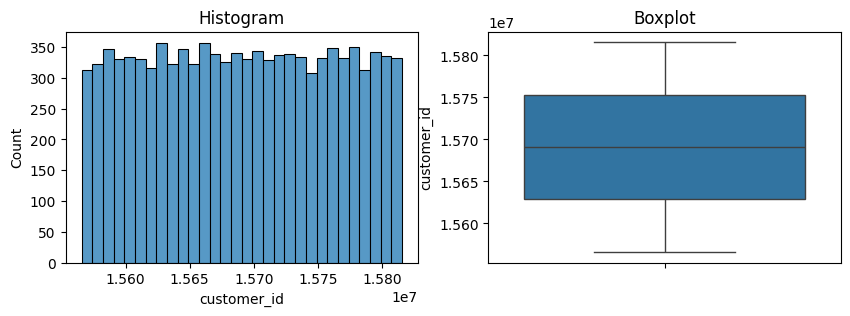

Skewness: 0.001149145900554239
Kurtosis: -1.196112526406602


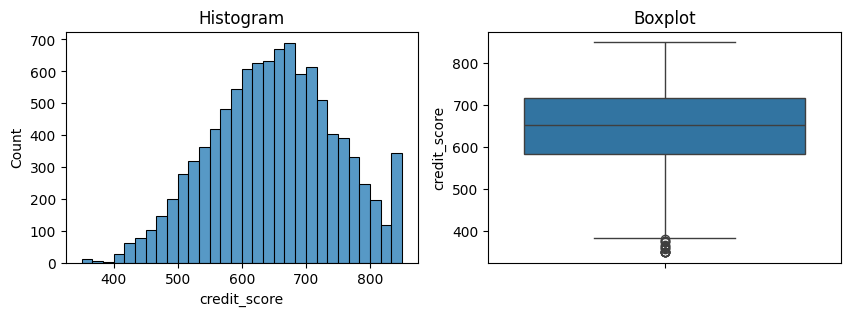

Skewness: -0.07160660820092675
Kurtosis: -0.42572568480291295


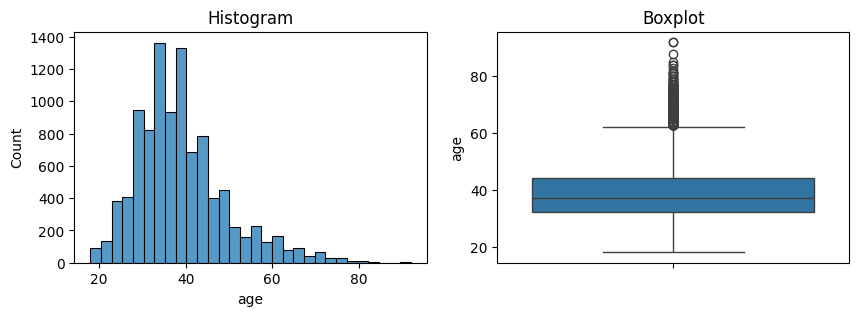

Skewness: 1.0113202630234552
Kurtosis: 1.3953470615086956


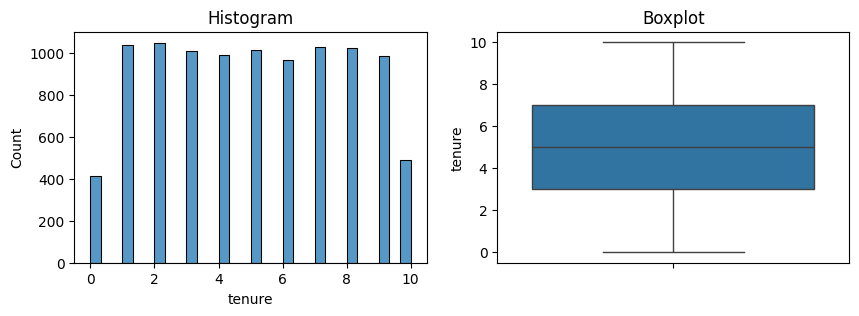

Skewness: 0.01099145797717904
Kurtosis: -1.1652252274891766


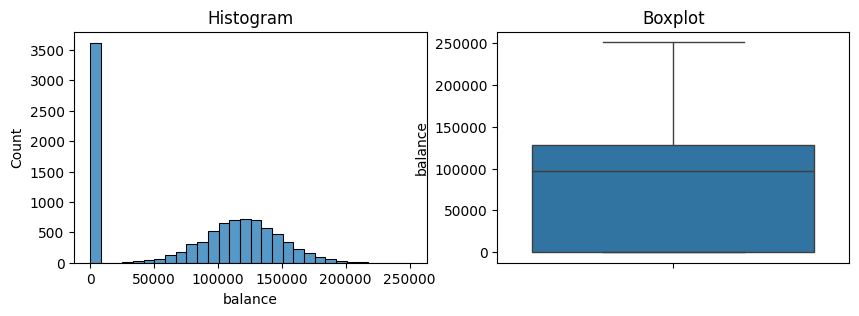

Skewness: -0.14110871094154384
Kurtosis: -1.489411767941925


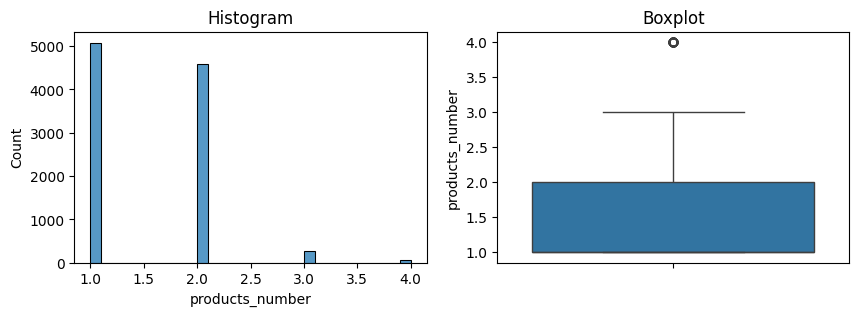

Skewness: 0.7455678882823168
Kurtosis: 0.5829807629457178


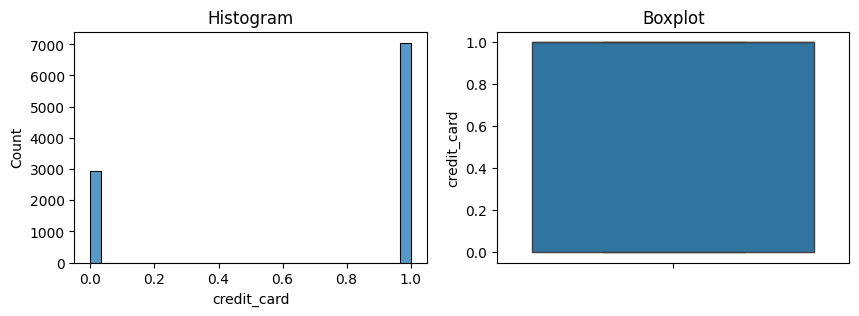

Skewness: -0.9018115952400578
Kurtosis: -1.1869732813556029


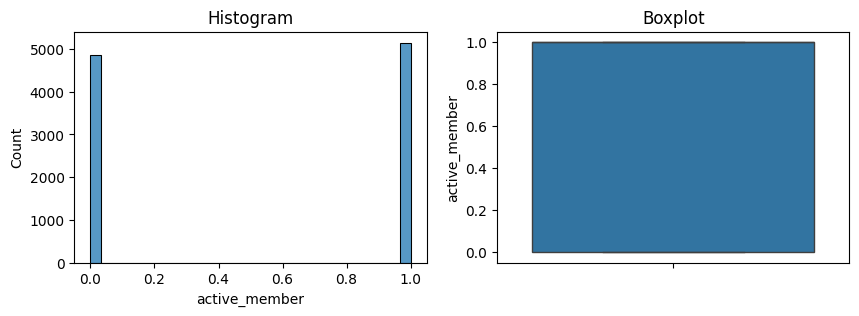

Skewness: -0.06043662833499078
Kurtosis: -1.9967468033281526


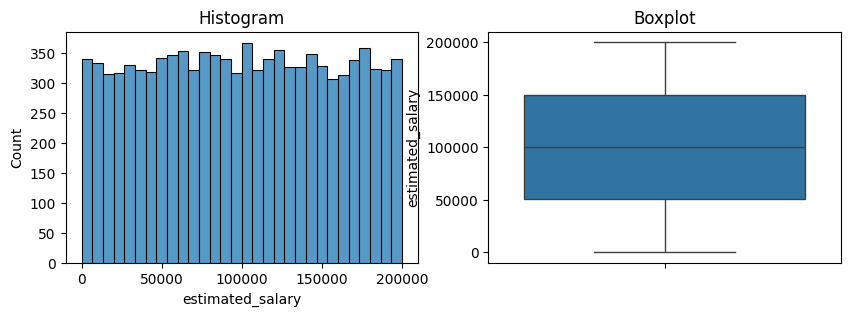

Skewness: 0.0020853576615585162
Kurtosis: -1.1815184473915485


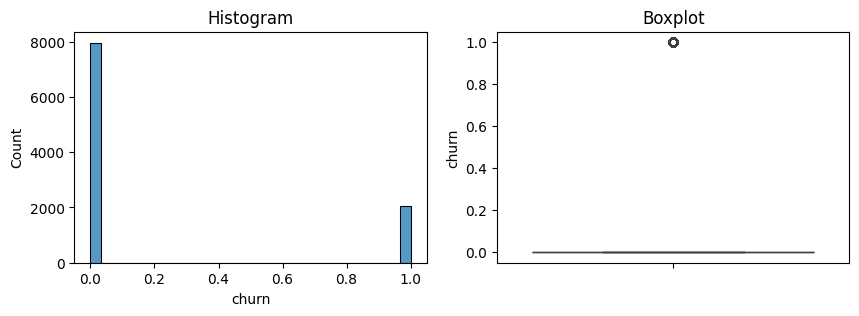

Skewness: 1.4716106649378211
Kurtosis: 0.16567104336407112


In [59]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[num_columns], num_columns)

dari data diatas kita bisa lihat bahwa data sudah terdistribusi dengan baik, dan tidak ada data outlier yang harus kita ganti atau ubah

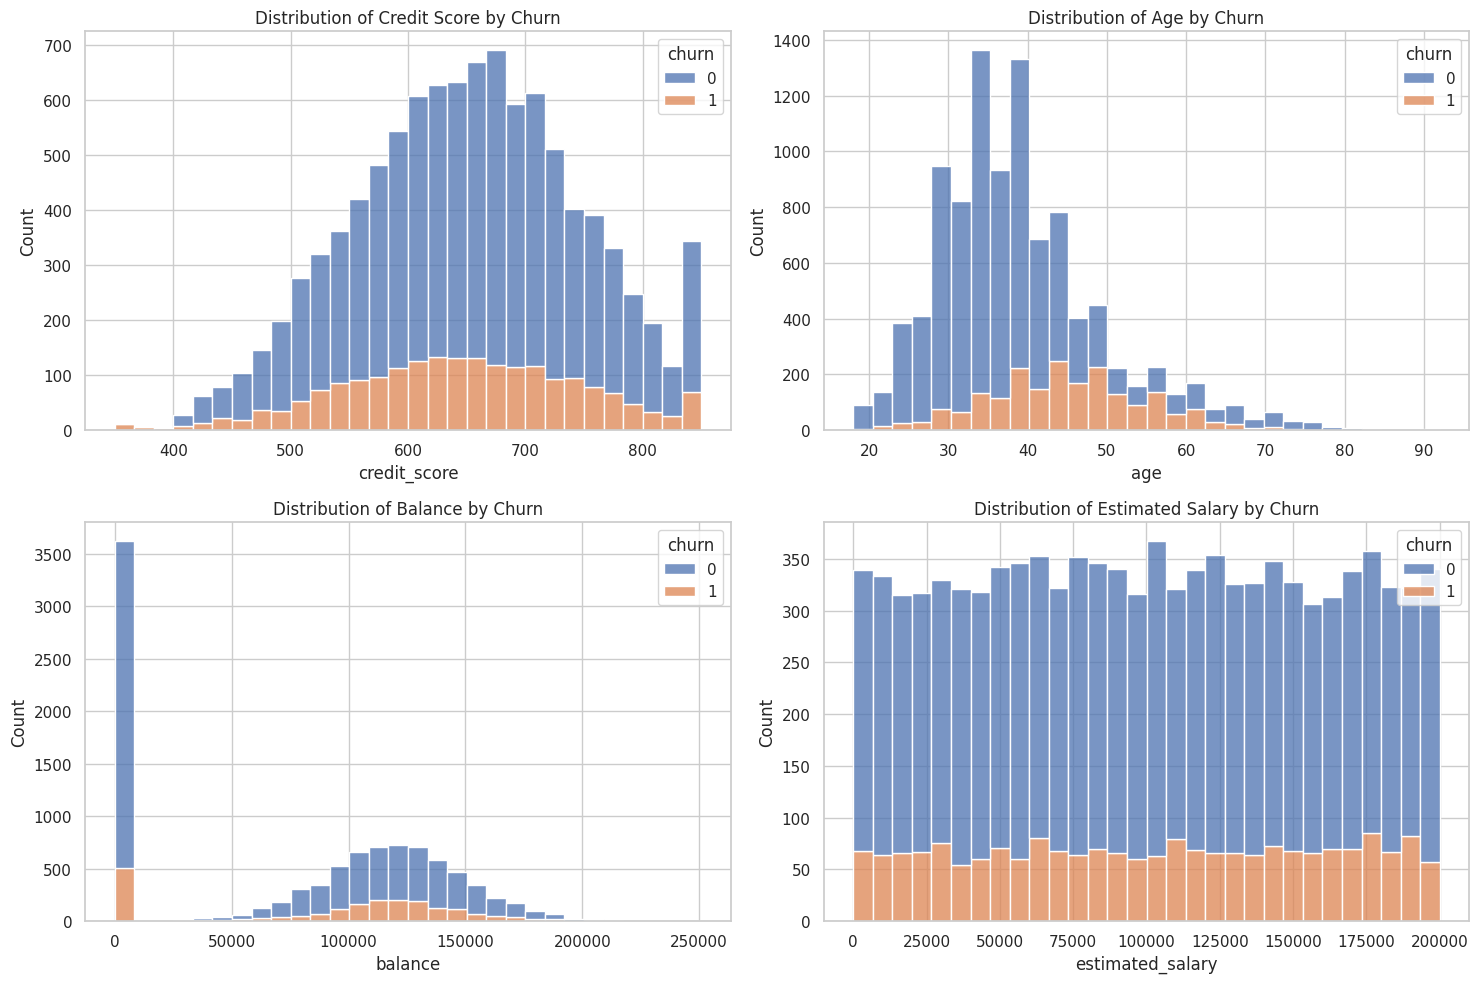

In [60]:
# Set up the figure size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Plot 1: Distribution of Credit Score by Churn
plt.subplot(2, 2, 1)
sns.histplot(df, x="credit_score", hue="churn", multiple="stack", bins=30)
plt.title('Distribution of Credit Score by Churn')

# Plot 2: Distribution of Age by Churn
plt.subplot(2, 2, 2)
sns.histplot(df, x="age", hue="churn", multiple="stack", bins=30)
plt.title('Distribution of Age by Churn')

# Plot 3: Distribution of Balance by Churn
plt.subplot(2, 2, 3)
sns.histplot(df, x="balance", hue="churn", multiple="stack", bins=30)
plt.title('Distribution of Balance by Churn')

# Plot 4: Distribution of Estimated Salary by Churn
plt.subplot(2, 2, 4)
sns.histplot(df, x="estimated_salary", hue="churn", multiple="stack", bins=30)
plt.title('Distribution of Estimated Salary by Churn')

# Adjust layout
plt.tight_layout()
plt.show()

Credit Score:
Pelanggan yang memiliki churn, sedikit lebih sering terjadi pada kredit skor yang lebih rendah. Tetapi sebenernya, distribusi churn ada di hampir semua rentang credit score.

Age:
Churn lebih sering terjadi pada pelanggan yang berusia sekitar 40-60 tahun. Ini menyimpulkan bahwa kelompok usia tersebut lebih rentan untuk keluar dibandingkan dengan kelompok usia lebih muda atau lebih tua.

Balance:
Pelanggan dengan saldo nol memiliki tingkat churn yang tinggi. Namun, churn juga lumayan tinggi di pelanggan yang mempunyai saldo lebih besar, di range 100.000 hingga 200.000.

Estimated Salary:
Distribusi estimasi gaji cukup merata di antara pelanggan yang churn dan yang tidak churn.

bisa dilhat bahwa, beberapa variabel seperti age dan balance memberikan penggambaran yang lebih jelas tentang churn dibandingkan dengan yang lain seperti credit score dan estimated salary.

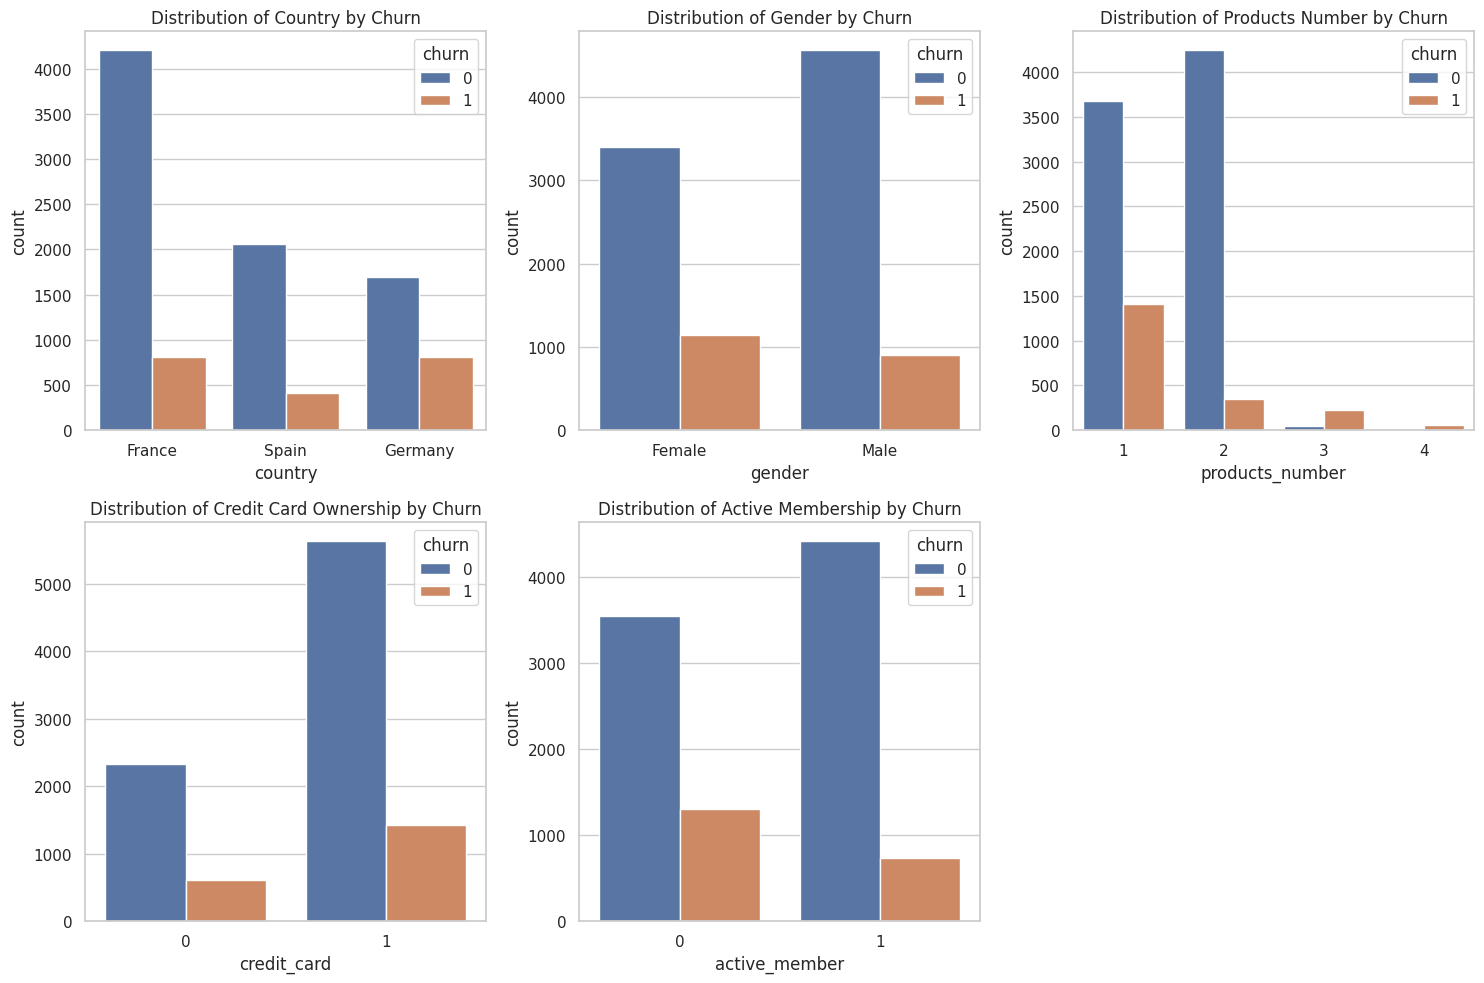

In [61]:
# Set up the figure size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Plot 1: Distribution of Country by Churn
plt.subplot(2, 3, 1)
sns.countplot(data=df, x="country", hue="churn")
plt.title('Distribution of Country by Churn')

# Plot 2: Distribution of Gender by Churn
plt.subplot(2, 3, 2)
sns.countplot(data=df, x="gender", hue="churn")
plt.title('Distribution of Gender by Churn')

# Plot 3: Distribution of Products Number by Churn
plt.subplot(2, 3, 3)
sns.countplot(data=df, x="products_number", hue="churn")
plt.title('Distribution of Products Number by Churn')

# Plot 4: Distribution of Credit Card Ownership by Churn
plt.subplot(2, 3, 4)
sns.countplot(data=df, x="credit_card", hue="churn")
plt.title('Distribution of Credit Card Ownership by Churn')

# Plot 5: Distribution of Active Membership by Churn
plt.subplot(2, 3, 5)
sns.countplot(data=df, x="active_member", hue="churn")
plt.title('Distribution of Active Membership by Churn')

# Adjust layout
plt.tight_layout()
plt.show()


Country:
Pelanggan dari Jerman memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan dari Prancis dan Spanyol.

Gender:
Pelanggan perempuan memiliki tingkat churn yang lebih tinggi dibandingkan dengan laki-laki.

Products Number:
Churn lebih sering terjadi pada pelanggan yang memiliki 1 produk. Namun, pelanggan yang memiliki 3 atau 4 produk juga menunjukkan tingkat churn yang cukup tinggi meskipun jumlahnya kecil.

Credit Card:
Pelanggan yang memiliki kartu kredit memiliki tingkat churn yang lebih rendah.

Active Membership:
Pelanggan yang aktif sebagai anggota memiliki tingkat churn yang lebih rendah

#**Preprocess The Data**

In [62]:
# Remove the customer_id column
df = df.drop('customer_id', axis=1)

# Check if the column is removed
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Meremove kolom customer id karena ketika kita membuat model kita tidak membutuhkan kolom tersebut

In [63]:
# Import libraries for encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Inisialisasi encoder tanpa drop
ohe_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
bin_enc = LabelEncoder()

# Lakukan one-hot encoding pada kolom kategorikal
one_hot_encoded = ohe_enc.fit_transform(df[['country']])

# Buat DataFrame dengan kolom yang telah di-encode
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(['country']))

# Gabungkan DataFrame yang di-encode dengan DataFrame asli
df = df.join(one_hot_df)

# Hapus kolom kategorikal yang asli
df.drop(columns=['country'], inplace=True)

# Fit transform kolom gender dengan label encoder
df['gender'] = bin_enc.fit_transform(df['gender'])

# Tampilkan data
df.head()


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


 mengubah kolom kategorikal "country" menjadi representasi numerik menggunakan one-hot encoding dan mengonversi kolom "gender" menjadi nilai numerik dengan label encoding, sebelum menyajikan data dalam format yang siap digunakan untuk analisis atau model machine learning.

# **Training Data**

In [64]:
from sklearn.model_selection import train_test_split

# Misalkan df sudah didefinisikan sebelumnya dan merupakan DataFrame yang ada

# 1. Tentukan variabel X (fitur) dan y (target) menggunakan iloc
X = df.iloc[:, df.columns != 'churn']  # Mengambil semua kolom kecuali 'churn'
y = df['churn']                         # Menetapkan 'churn' sebagai target

# 2. Gunakan train_test_split untuk membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 3. Tampilkan ukuran dari set pelatihan dan pengujian
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



Shape of X_train: (8000, 12)
Shape of X_test: (2000, 12)


Pembagian dataset menjadi data pelatihan dan pengujian adalah langkah penting dalam machine learning untuk mencegah overfitting dan memastikan model dapat generalisasi dengan baik. Pembagian umum 80-20 memungkinkan model dilatih dengan cukup data 8000 contoh dan dievaluasi dengan data yang belum pernah dilihat sebelumnya 2000 contoh.

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Scalers
minmax_scaler = MinMaxScaler()

# Scale the X train and X test
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

menggunakan MinMaxScaler untuk menormalkan fitur dan target ke dalam rentang [0, 1], memastikan data pelatihan dan pengujian memiliki skala yang konsisten

# **Evaluate Model**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1586
           1       0.63      0.22      0.33       414

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.61      2000
weighted avg       0.79      0.81      0.78      2000



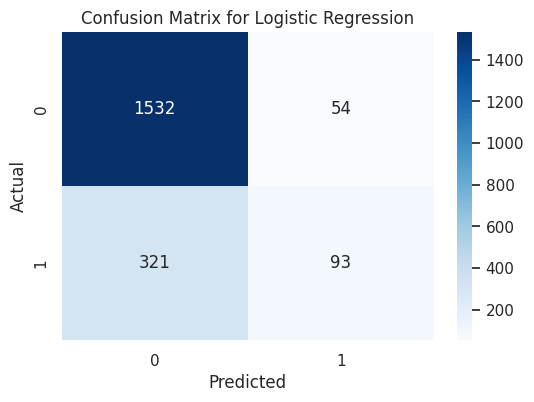


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1586
           1       0.62      0.34      0.44       414

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.67      2000
weighted avg       0.80      0.82      0.80      2000



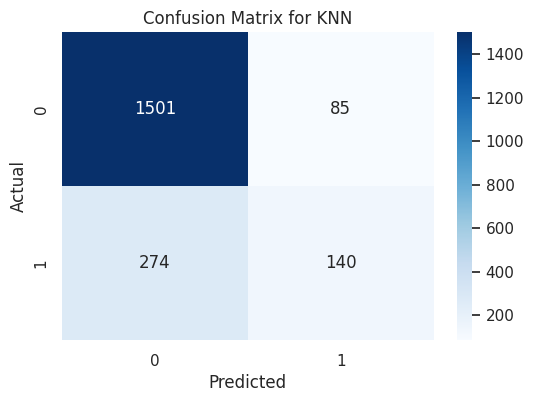


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1586
           1       0.84      0.24      0.38       414

    accuracy                           0.83      2000
   macro avg       0.84      0.62      0.64      2000
weighted avg       0.84      0.83      0.80      2000



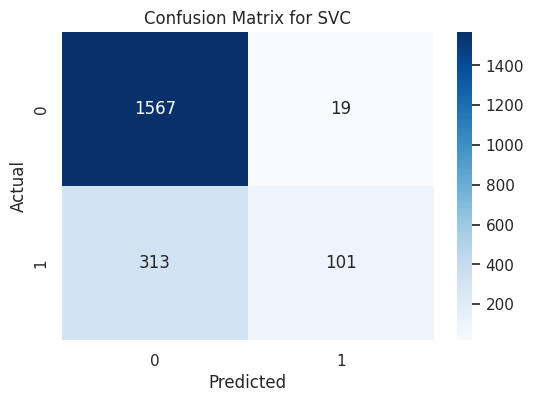


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1586
           1       0.51      0.53      0.52       414

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.80      0.80      2000



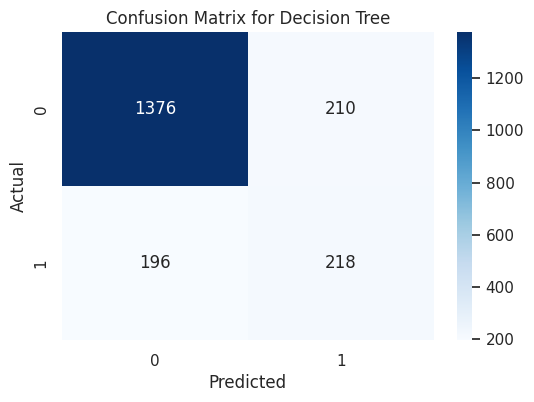


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1586
           1       0.77      0.47      0.59       414

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



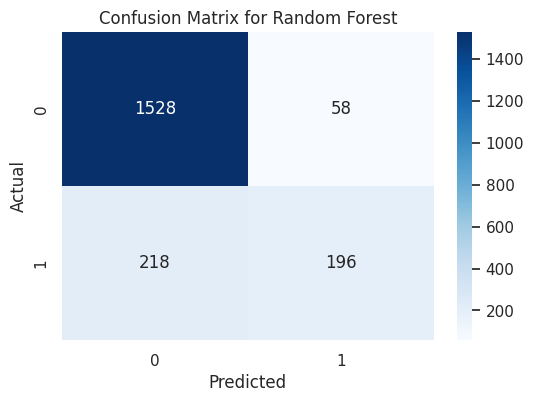


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1586
           1       0.71      0.51      0.59       414

    accuracy                           0.85      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



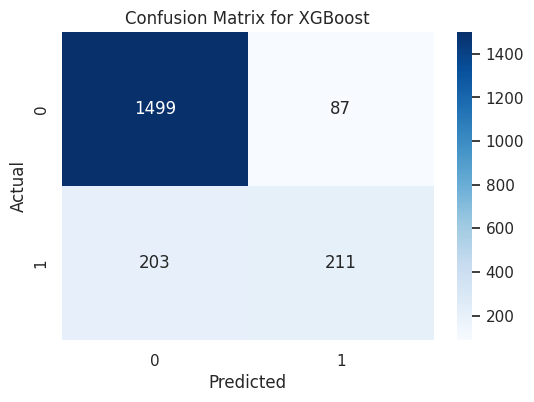

In [70]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define models
model_list = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

# Corresponding model names
model_names = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'XGBoost']

# Train and evaluate each model
for model, name in zip(model_list, model_names):
    # Fit model on training data
    model.fit(X_train, y_train)

    # Get predictions
    y_pred = model.predict(X_test)

    # Print model performance
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


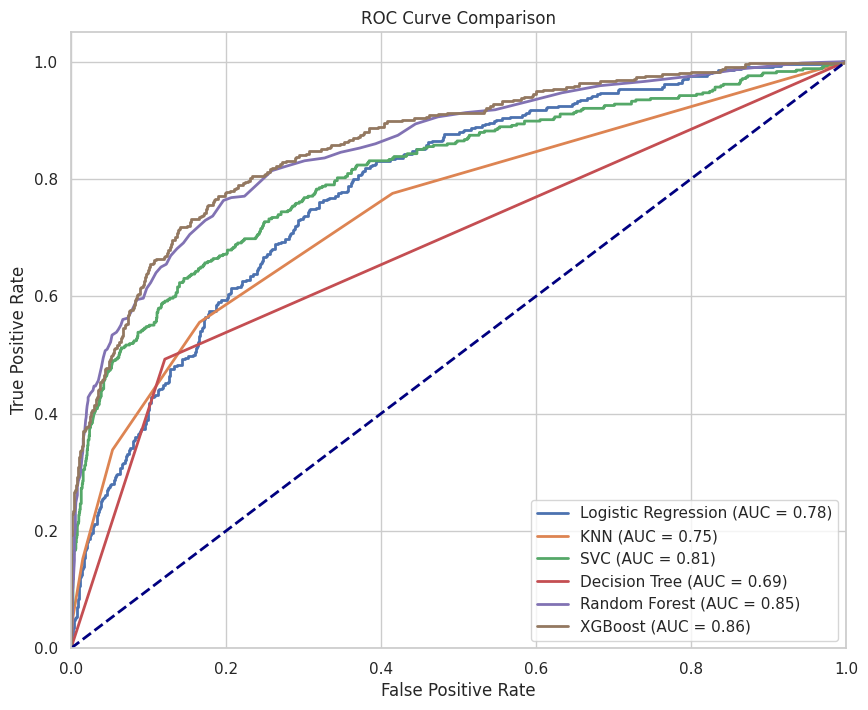

In [71]:
# Initialize plot for ROC curves
plt.figure(figsize=(10, 8))

# Train and evaluate each model
for model, name in zip(model_list, model_names):
    # Fit model on training data
    model.fit(X_train, y_train)

    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


memilih Random Forest karena model ini:

- Memiliki akurasi yang sedikit lebih tinggi.
- Lebih baik dalam menghindari false positives dengan precision yang lebih tinggi.
- Memberikan hasil yang lebih seimbang secara keseluruhan (macro dan weighted avg).
- Lebih mudah diimplementasikan dan diinterpretasikan dibandingkan XGBoost.
- Dengan melihat grafik di ROC Curve, Random forest juga menjadi salah satu model yang terbaik uutuk kita pilih

In [72]:
#Test menggunakan Random forest

from sklearn.ensemble import RandomForestClassifier

# Pastikan y_train adalah 1D array
y_train = y_train.ravel() if y_train.ndim > 1 else y_train  # Ravel hanya jika diperlukan

# Membuat dan melatih model Random Forest
random_forest_model = RandomForestClassifier(criterion='gini', max_depth=4)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4)

In [73]:
y_predict = random_forest_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Menampilkan classification report untuk evaluasi lebih lanjut
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

Accuracy: 85.50%

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1586
           1       0.71      0.51      0.59       414

    accuracy                           0.85      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



Model Random Forest menunjukkan performa yang sangat baik dalam mengidentifikasi kelas 0, tetapi kurang baik dalam mengidentifikasi kelas 1.

# **Explain what is the ROC curve and what does it tell us about a classification model's performance**

ROC curve, atau Receiver Operating Characteristic curve, adalah alat visual yang digunakan untuk menilai kinerja model klasifikasi biner dengan menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai ambang batas (threshold).

TPR, yang juga dikenal sebagai sensitivitas atau recall, mengukur proporsi hasil positif yang berhasil diidentifikasi dengan benar oleh model

Sedangkan FPR mengukur proporsi hasil negatif yang salah diidentifikasi sebagai positif.

Dalam grafik ROC, sumbu X mewakili FPR dan sumbu Y mewakili TPR, dengan garis diagonal dari titik (0,0) ke (1,1) menunjukkan kinerja model acak; semakin jauh kurva dari garis ini, semakin baik kinerja model.

Area di bawah kurva (AUC) merupakan metrik kunci yang menunjukkan seberapa baik model dapat membedakan antara kelas positif dan negatif, dengan nilai AUC 1 menandakan model sempurna, nilai 0.5 menunjukkan model tidak lebih baik dari tebakan acak, dan nilai di bawah 0.5 menandakan kinerja buruk.

ROC curve sangat berguna untuk memilih ambang batas yang optimal dan untuk membandingkan beberapa model klasifikasi, serta memberikan wawasan mengenai trade-off antara TPR dan FPR, yang sangat penting dalam konteks aplikasi yang memiliki konsekuensi berbeda untuk kesalahan positif dan negatif.

# **One taboo in ML is fitting scalers and encoders to the whole dataset. Why?**

Melakukan fitting scalers atau encoders pada seluruh dataset sebelum membagi data menjadi data latih dan data uji dianggap tabu karena bisa menyebabkan **data leakage**. Artinya, informasi dari data uji yang seharusnya tidak diketahui selama pelatihan ikut digunakan saat menyesuaikan skala atau encoding, sehingga model menjadi “terbantu” oleh data yang belum seharusnya dilihat. Ini bisa membuat hasil evaluasi model tampak lebih baik dari yang sebenarnya dan tidak mencerminkan performa model pada data yang benar-benar baru. Oleh karena itu, scalers dan encoders hanya boleh di-fit pada data latih untuk menjaga validitas hasil evaluasi.